In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itc-limitednse-stock/ITC.NS (1).csv


In [31]:
df=pd.read_csv('../input/itc-limitednse-stock/ITC.NS (1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,5.55000,5.60000,5.53333,5.58333,0.000079,985500.0
1,1996-01-02,5.46667,5.56667,5.28889,5.37222,0.000076,7470000.0
2,1996-01-03,5.13333,5.25444,5.10111,5.20000,0.000074,15160500.0
3,1996-01-04,5.20000,5.33222,5.14444,5.29778,0.000075,12397500.0
4,1996-01-05,5.29778,5.27778,5.18889,5.20222,0.000074,5008500.0


In [33]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6180 non-null   object 
 1   Open       6055 non-null   float64
 2   High       6055 non-null   float64
 3   Low        6055 non-null   float64
 4   Close      6055 non-null   float64
 5   Adj Close  6055 non-null   float64
 6   Volume     6055 non-null   float64
dtypes: float64(6), object(1)
memory usage: 338.1+ KB


In [35]:
df.memory_usage()

Index          128
Date         49440
Open         49440
High         49440
Low          49440
Close        49440
Adj Close    49440
Volume       49440
dtype: int64

In [36]:
df.memory_usage().sum()

346208

In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6055.000000,6055.000000,6055.000000,6055.000000,6055.000000,6.055000e+03
mean,107.548122,108.777171,106.157021,107.458982,85.936903,4.739457e+07
std,98.968068,99.861128,97.923669,98.870242,95.022238,1.051693e+08
min,4.182220,4.222220,4.144440,4.182220,0.000059,0.000000e+00
25%,17.482250,17.761150,17.155600,17.442750,0.003371,8.735850e+06
50%,62.066700,63.200001,60.883301,61.883301,40.237232,1.342674e+07
75%,212.432999,214.650002,210.000000,212.116501,182.853279,2.630441e+07
max,346.000000,354.799988,340.299988,342.500000,313.638275,1.294168e+09


In [38]:
df.mean()

Open         1.075481e+02
High         1.087772e+02
Low          1.061570e+02
Close        1.074590e+02
Adj Close    8.593690e+01
Volume       4.739457e+07
dtype: float64

In [40]:
df['Close'].mean()

107.45898236928163

In [41]:
df.var()

Open         9.794679e+03
High         9.972245e+03
Low          9.589045e+03
Close        9.775325e+03
Adj Close    9.029226e+03
Volume       1.106059e+16
dtype: float64

In [42]:
df.skew()

Open         0.607200
High         0.604082
Low          0.610294
Close        0.605949
Adj Close    0.682449
Volume       4.407068
dtype: float64

In [43]:
df.kurtosis()

Open         -1.214657
High         -1.218382
Low          -1.211819
Close        -1.217522
Adj Close    -1.085017
Volume       24.773897
dtype: float64

In [44]:
df.min()

Date         1996-01-01
Open            4.18222
High            4.22222
Low             4.14444
Close           4.18222
Adj Close      0.000059
Volume              0.0
dtype: object

In [45]:
df.max()

Date           2020-07-07
Open                346.0
High           354.799988
Low            340.299988
Close               342.5
Adj Close      313.638275
Volume       1294168500.0
dtype: object

In [46]:
df.median()

Open         6.206670e+01
High         6.320000e+01
Low          6.088330e+01
Close        6.188330e+01
Adj Close    4.023723e+01
Volume       1.342674e+07
dtype: float64

In [47]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999886,0.999856,0.999769,0.997335,-0.319715
High,0.999886,1.000000,0.999824,0.999896,0.997398,-0.319621
Low,0.999856,0.999824,1.000000,0.999887,0.997428,-0.319600
Close,0.999769,0.999896,0.999887,1.000000,0.997445,-0.319621
Adj Close,0.997335,0.997398,0.997428,0.997445,1.000000,-0.300680
Volume,-0.319715,-0.319621,-0.319600,-0.319621,-0.300680,1.000000


In [48]:
import seaborn as sn

<AxesSubplot:>

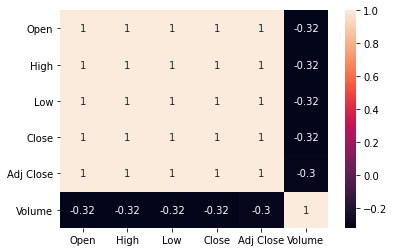

In [49]:
sn.heatmap(df.corr(),annot=True)

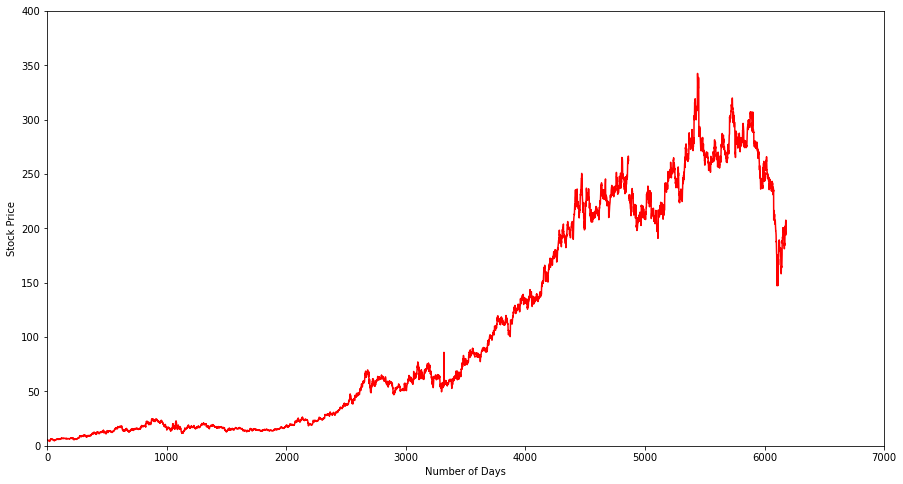

In [57]:
df['Close'].plot(figsize=(15, 8), color='red') # color and figsize changed

plt.xlim(0, 7000) # range for x-axis
plt.ylim(0, 400) # range for x-axis
plt.xlabel('Number of Days')
plt.ylabel('Stock Price');

<AxesSubplot:xlabel='Open', ylabel='Close'>

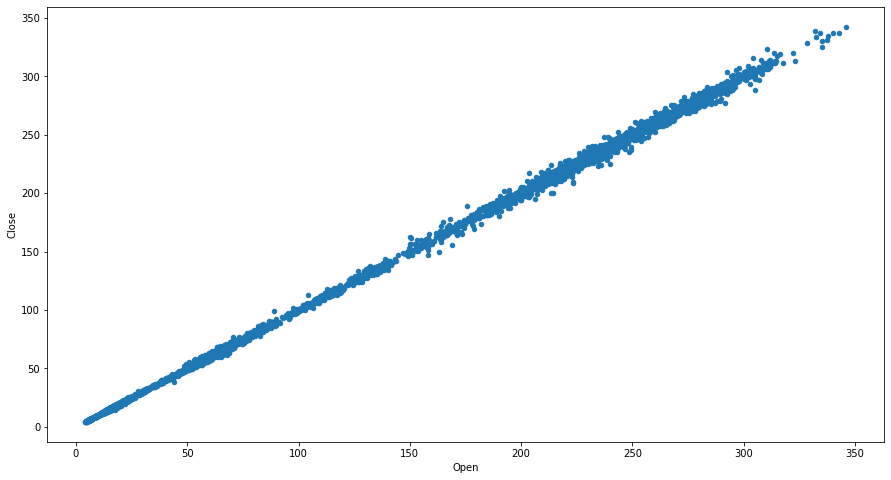

In [59]:
df.plot.scatter('Open', 'Close', figsize=(15, 8))

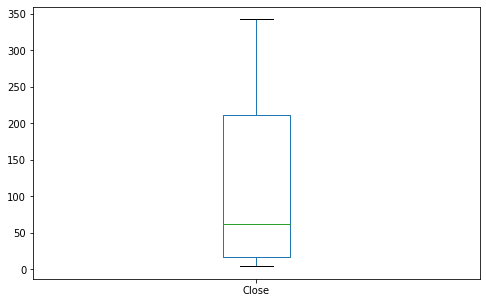

In [60]:
df['Close'].plot.box(figsize=(8, 5));

<AxesSubplot:>

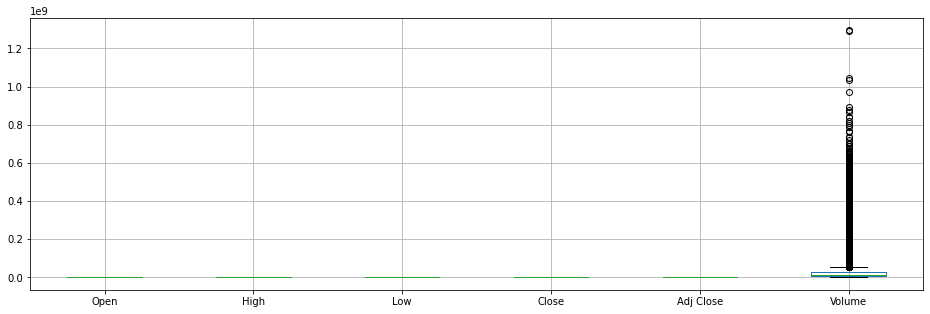

In [61]:
df.boxplot(figsize=(16, 5))

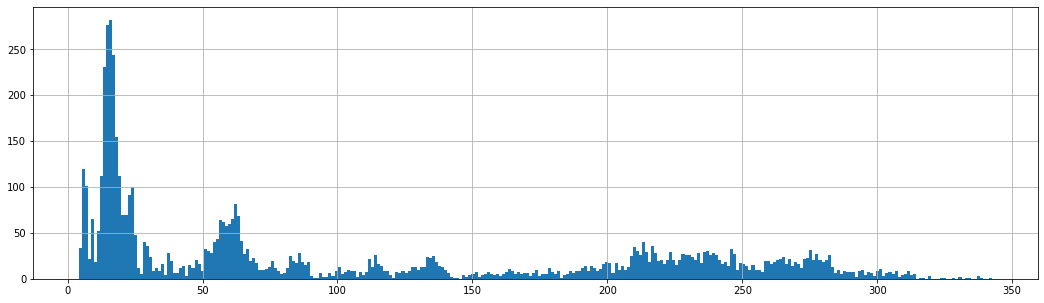

In [66]:
df['Close'].hist(bins=300, figsize=(18, 5));

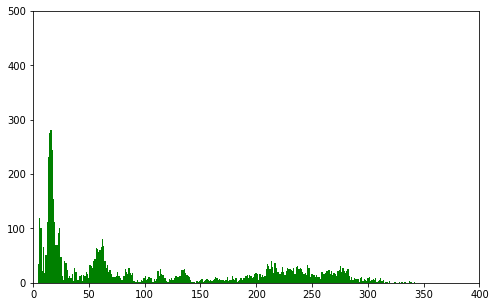

In [72]:
ax = df['Close'].hist(bins=300, grid=False, color='green', figsize=(8, 5)) # grid turned off and color changed



ax.set_xlim(0,400) # limiting display range to 0-70 for the x-axis
ax.set_ylim(0, 500);

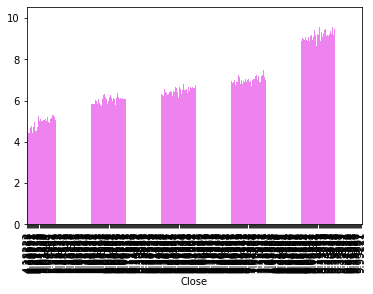

In [73]:
df_avg_BP = df.groupby('Close')['Open'].mean()
df_avg_BP[:10].plot.bar(color='violet');

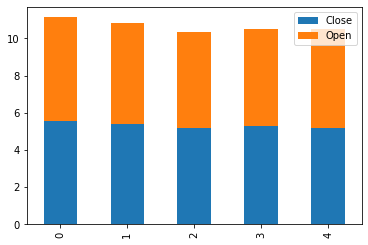

In [75]:
ax = df[['Close', 'Open']][:5].plot.bar(stacked=True)

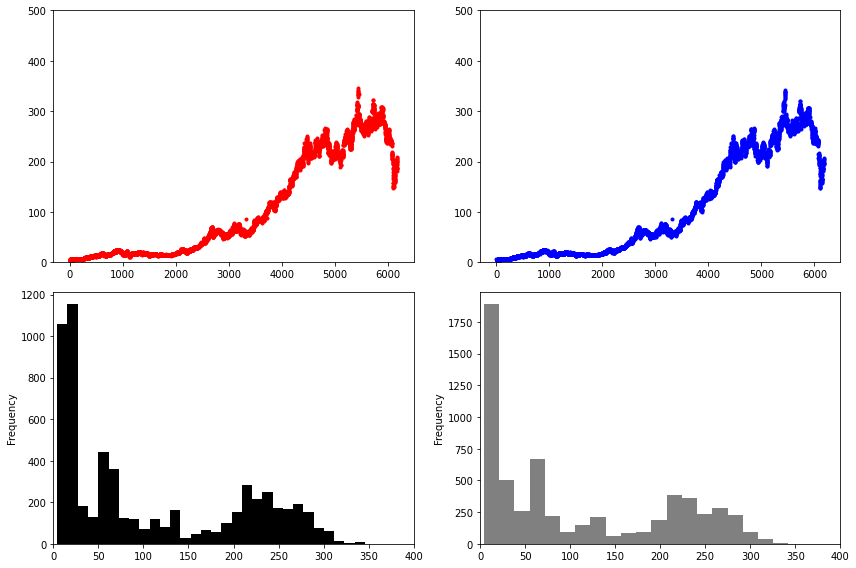

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# or fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(12, 8))

# axes is the axes object(s). It can be a single object or an array of objects. 
# In this case, it is an array of dimension 2-by-2

df['Open'].plot(ax = axes[0][0], style='.', color='red') # top left
df['Close'].plot(ax = axes[0][1], style='.', color='blue') # top right

df['Open'].plot.hist(bins=30, ax = axes[1][0], color='black') # bottom left
df['Close'].plot.hist(bins=20, ax = axes[1][1], color='gray') # bottom right

axes[0][0].set_ylim(0, 500)
axes[0][1].set_ylim(0, 500)

axes[1][0].set_xlim(0, 400)
axes[1][1].set_xlim(0, 400)

fig.tight_layout()